# Feature Scaling
## Standardization & Normalization

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df2 = df[['survived',"pclass",'age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
df2.shape

(891, 4)

In [5]:
df3 = df2.fillna(df2.mean())
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [6]:
X = df3.drop("survived", axis = 1)
y = df3["survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [12]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [14]:
X_train

,pclass,age,parch
770,3,24.000000,0
152,3,55.500000,0
731,3,11.000000,0
775,3,18.000000,0
324,3,29.699118,2
...,...,...,...
528,3,39.000000,0
709,3,29.699118,1
736,3,48.000000,3
485,3,29.699118,1


In [15]:
sc = StandardScaler()
sc.fit(X_train )

StandardScaler()

In [16]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [17]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [18]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [19]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [21]:
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["pclass",'age','parch'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age','parch'])

In [22]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [24]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [25]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [26]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [27]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [28]:
X_train_mmc =  pd.DataFrame(X_train_mmc, columns = ["pclass",'age','parch'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["pclass",'age','parch'])

In [29]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


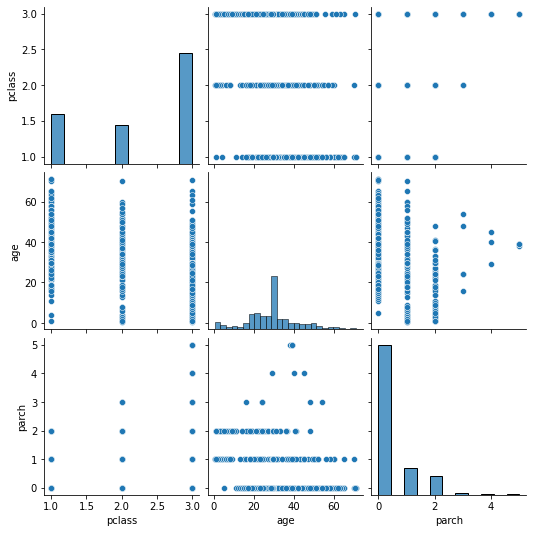

In [30]:
sns.pairplot(X_train)

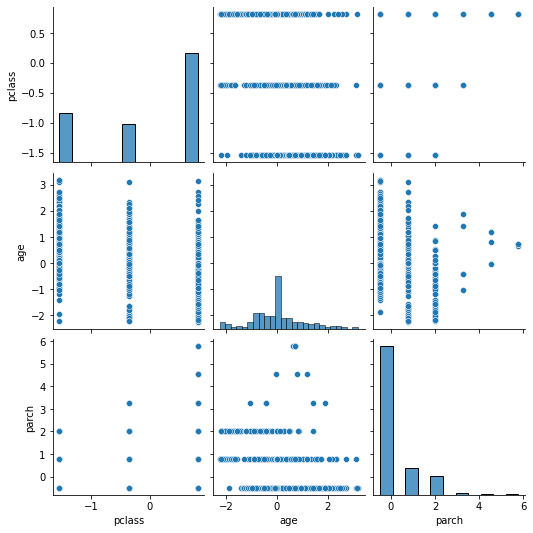

In [31]:
sns.pairplot(X_train_sc)

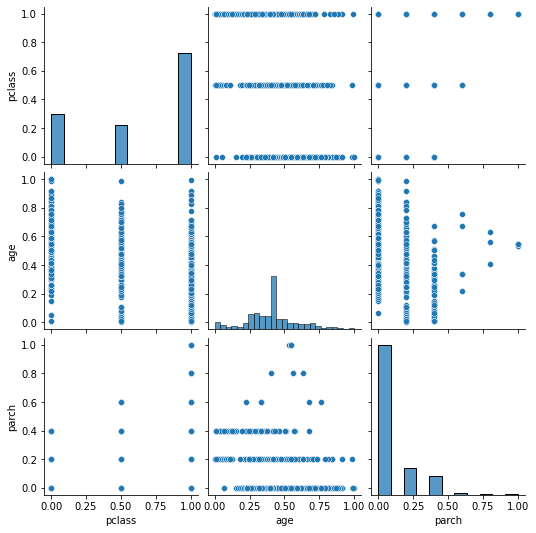

In [32]:
sns.pairplot(X_train_mmc)